In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sys
if ".." not in sys.path: sys.path.append("..")
from common.cosmology import switch_hubble_and_time_rad_dom

In [17]:
def rhs(t, y, m_a):
    theta, theta_dot = y
    H = switch_hubble_and_time_rad_dom(t)
    theta_dotdot = - 3 * H * theta_dot - m_a**2 * np.sin(theta)
    return theta_dot, theta_dotdot

In [49]:
def solve(m_a, v):
    tspan = (switch_hubble_and_time_rad_dom(m_a*1e2), switch_hubble_and_time_rad_dom(m_a*1e-3))
    steps = np.geomspace(*tspan, 1000); steps[0], steps[-1] = tspan
    sol = solve_ivp(rhs, tspan, [0, v], args=(m_a,), t_eval=steps)
    assert sol.success
    t = sol.t; theta, theta_dot = sol.y
    return t, theta, theta_dot

def find_t_osc(t, theta):
    fst_goes_down_idx = np.where(theta[:-1] > theta[1:])[0][0]
    t_osc = t[fst_goes_down_idx]
    return t_osc

def solve_and_plot(m_a=1, v=1e4):
    t, theta, _ = solve(m_a, v)
    t_osc = find_t_osc(t, theta)

    plt.semilogx(t, theta)
    plt.axvline(t_osc, ls="--", color="black")
    plt.xlabel("t / GeV", fontsize=15)
    plt.ylabel("$\\theta$", fontsize=15)

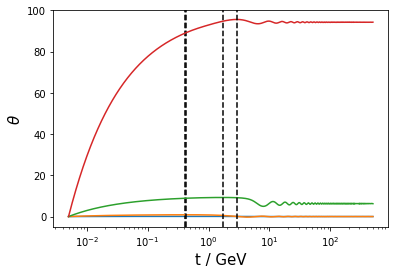

In [50]:
for v in [1e1, 1e2, 1e3, 1e4]: solve_and_plot(v=v)

In [51]:
v_range = np.geomspace(1, 1e4, 100)
m_a = 1
t_osc = [find_t_osc(*solve(m_a, v)[:-1]) for v in v_range]

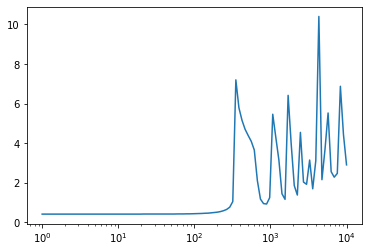

In [52]:
plt.semilogx(v_range, t_osc)